# Random forest

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from datasets.methods import dataset_information, delete_dataset_features, fill_dataset_samples, extract_samples_labels
from predictors.treepredictors import TreePredictor
from predictors.forests import TreePredictorRandomForest
from commons.splitting_criteria import ThresholdCondition, MembershipCondition, RandomFeaturesSelector
from commons.splitting_criteria import information_gain
from commons.losses import zero_one_loss, samples_error
from commons.plotting import plot_train_test_error

## Dataset & pre-processing

In [2]:
## CONSTANTS

DATASET_FILENAME = 'datasets/mushroom_secondary.csv'
SAMPLES_NUMBER = 60_000
DELETION_THRESHOLD = 0.20
IMPUTATION_VALUE = 'u'
NORMALIZATION = True
RANDOM_SEED = 1234

In [3]:
## Loading dataset

mushroom_dataset = pd.read_csv(DATASET_FILENAME, sep=';', nrows=SAMPLES_NUMBER)

## Dataset pre-processing

mushroom_dataset = delete_dataset_features(mushroom_dataset, DELETION_THRESHOLD)
mushroom_dataset = fill_dataset_samples(mushroom_dataset, IMPUTATION_VALUE)

## Dataset information

information = dataset_information(mushroom_dataset, NORMALIZATION)

print('Dataset information:')
for k, v in information.items():
    print(f'{k}: {v}')

Dataset information:
samples: 60000
features: 14
features names: ['class' 'cap-diameter' 'cap-shape' 'cap-color' 'does-bruise-or-bleed'
 'gill-attachment' 'gill-color' 'stem-height' 'stem-width' 'stem-color'
 'has-ring' 'ring-type' 'habitat' 'season']
classes: ['e' 'p']
classes samples: class
p    0.552867
e    0.447133
Name: count, dtype: float64
null samples: 0.0
null features: class                   0.0
cap-diameter            0.0
cap-shape               0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-attachment         0.0
gill-color              0.0
stem-height             0.0
stem-width              0.0
stem-color              0.0
has-ring                0.0
ring-type               0.0
habitat                 0.0
season                  0.0
dtype: float64


## Train and test split

In [4]:
## CONSTANTS

RANDOM_SEED = 1234
TEST_SIZE = 0.2
SHUFFLE = True

In [5]:
samples_set, labels_set = extract_samples_labels(mushroom_dataset)
train_sample_set, test_sample_set, train_labels_set, test_labels_set = train_test_split(samples_set, labels_set, test_size=TEST_SIZE, shuffle=SHUFFLE, random_state=RANDOM_SEED)

print(f'Original dataset size: {len(samples_set)}')
print(f'Train set size:        {len(train_sample_set)}')
print(f'Test set size:         {len(test_sample_set)}')
print()
print(f'Data and label example:')
print(f'({train_sample_set[0]}, {train_labels_set[0]})')

Original dataset size: 60000
Train set size:        48000
Test set size:         12000

Data and label example:
([1.93 'b' 'g' 'f' 'a' 'g' 4.58 1.72 'n' 'f' 'f' 'd' 'u'], p)


## Random forests

In [6]:
## CONSTANTS

RANDOM_SEED = 1234
TREES_NUMBER = 5
FEATURES_NUMBER = 8
VERBOSE = True

In [7]:
## Hyperparameters (tree)

continuous_condition = ThresholdCondition
categorical_condition = MembershipCondition
node_stopping_criteria = []
tree_stopping_criteria = []
decision_metric = information_gain

In [8]:
## Forest definition

random_forest = TreePredictorRandomForest(
    tree_predictors_number=TREES_NUMBER,
    continuous_condition=continuous_condition,
    categorical_condition=categorical_condition,
    decision_metric=decision_metric,
    tree_stopping_criteria=tree_stopping_criteria,
    node_stopping_criteria=node_stopping_criteria,
    random_seed=RANDOM_SEED
)

print(f'Initial random forest predictor:')
print(random_forest)
print(f'Trees depths:  {[tree._depth for tree in random_forest._tree_predictors]}')
print(f'Trees total nodes: {[tree._nodes_count for tree in random_forest._tree_predictors]}')
print(f'Trees leaf nodes:  {[tree._leaves_count for tree in random_forest._tree_predictors]}')

Initial random forest predictor:
Random forest composed of 5 tree predictors:
Trees depths:  []
Trees total nodes: []
Trees leaf nodes:  []


In [9]:
## Training forest predictor

random_forest.fit(train_sample_set, train_labels_set, VERBOSE)

Initialized new random forest
Trees bagging seeds: [27440 58068 34087 56374 60621]
Trees selector seeds: [23925 17049 55290 32400 55986]
Training trees...
Training tree predictor [0]...
bagging samples...
initializing selector...
initializing tree predictor
training tree predictor...
initialized new tree
Expanding tree...
tree status > depth: 1 total nodes: 1 leaf nodes: 1
nodes in queue: 1
current node > label: p samples: 48000 depth: 1
checking tree stop conditions:
checking node stop conditions:
- checking if entropy impurity <= 0
Expanding node...
Find best conditions among features [7 2 3 4]:
- checking feature [7] > possible parameters: 3949 continuous: True
- checking feature [2] > possible parameters: 12 continuous: False
- checking feature [3] > possible parameters: 2 continuous: False
- checking feature [4] > possible parameters: 8 continuous: False
best condition > feature index: 7 score: 0.04422519826095306 parameter: 8.434999999999999 continuous: True
>> best feature: 7 be

In [10]:
print(f'Trained random forest predictor:')
print(random_forest)
print(f'Trees depths:  {[tree._depth for tree in random_forest._tree_predictors]}')
print(f'Trees total nodes: {[tree._nodes_count for tree in random_forest._tree_predictors]}')
print(f'Trees leaf nodes:  {[tree._leaves_count for tree in random_forest._tree_predictors]}')

Trained random forest predictor:
Random forest composed of 5 tree predictors:
Tree predictor [0]:
TreePredictor:
{ Internal node -- feature index: 7, condition test: x <= 8.434999999999999, children number: 2 }
  { Internal node -- feature index: 10, condition test: x in {'z'}, children number: 2 }
    { Internal node -- feature index: 6, condition test: x <= 2.0549999999999997, children number: 2 }
      { Internal node -- feature index: 11, condition test: x in {'m'}, children number: 2 }
        { Internal node -- feature index: 3, condition test: x in {'f'}, children number: 2 }
          { Internal node -- feature index: 4, condition test: x in {'d'}, children number: 2 }
            { Internal node -- feature index: 7, condition test: x <= 27.165, children number: 2 }
              { Internal node -- feature index: 0, condition test: x <= 9.57, children number: 2 }
                | Leaf node -- label: p |
                | Leaf node -- label: e |
              { Internal node --

In [11]:
## Train and test errors

predictor = random_forest.predict

train_error = samples_error(predictor, zero_one_loss, train_labels_set, train_sample_set)

test_error = samples_error(predictor, zero_one_loss, test_labels_set, test_sample_set)

print(f'Train error: {train_error}')
print(f'Test error:  {test_error}')

Train error: 0.000875
Test error:  0.0020833333333333333


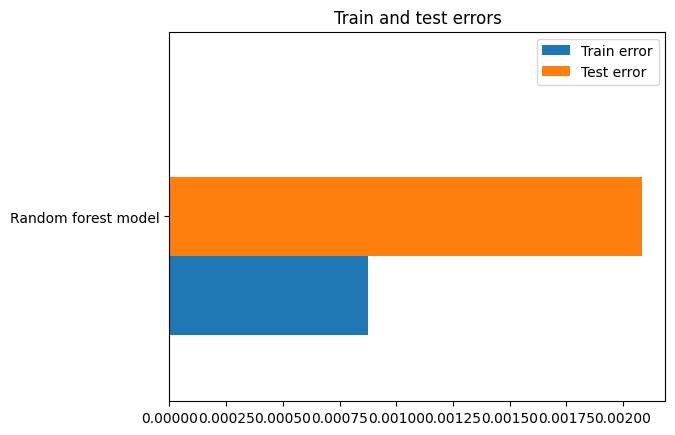

In [12]:
plot_train_test_error(['Random forest model'], [train_error], [test_error])

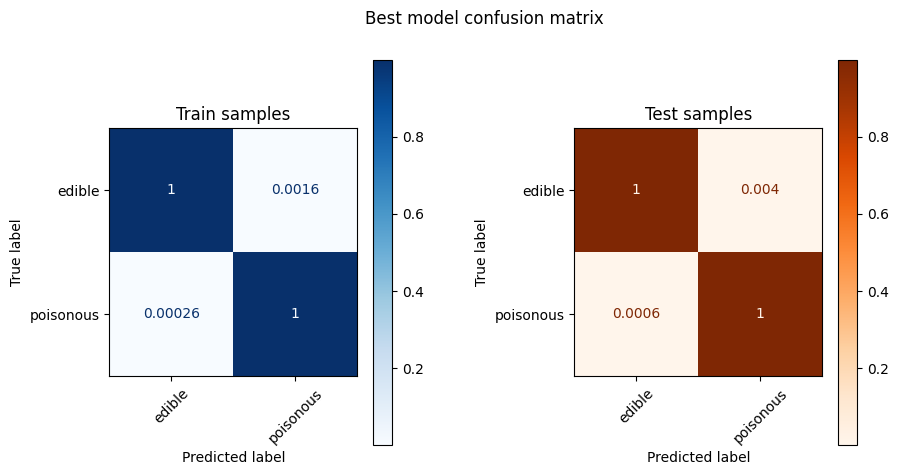

In [13]:
train_predictions = random_forest.predict(train_sample_set)
test_predictions = random_forest.predict(test_sample_set)
labels = ['edible', 'poisonous']

train_confusion_matrix = confusion_matrix(train_labels_set, train_predictions, normalize='true')
test_confusion_matrix = confusion_matrix(test_labels_set, test_predictions, normalize='true')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Best model confusion matrix')
plt.subplots_adjust(wspace=0.5)

matrix_display = ConfusionMatrixDisplay(train_confusion_matrix, display_labels=labels)
matrix_display.plot(ax=axes[0], xticks_rotation=45, cmap='Blues')
matrix_display.ax_.set_title('Train samples')

matrix_display = ConfusionMatrixDisplay(test_confusion_matrix, display_labels=labels)
matrix_display.plot(ax=axes[1], xticks_rotation=45, cmap='Oranges')
matrix_display.ax_.set_title('Test samples')

plt.show()